In [0]:
COLAB = True # NOTE change me if not running on Colab :D

In [2]:
if COLAB:
    print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv")
    print("                                Hey!                                ")
    print("    Don't forget to enter the authorization code for Drive below    ")
    print("                                 ;)                                 ")
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
                                Hey!                                
    Don't forget to enter the authorization code for Drive below    
                                 ;)                                 
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


## Importing libs

In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline
sns.set() # apply the seaborn defaults to plotted figures (e.g. theme, scaling, color palette), instead of matplotlib's

In [5]:
if COLAB:
    try:
        # Colab only
        %tensorflow_version 2.x
    except Exception:
        pass

TensorFlow 2.x selected.


In [6]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.0.0


In [0]:
import warnings
from time import time, strftime

In [8]:
strftime('%X')

'03:00:11'

## Preparing the Fashion-MNIST dataset
[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando’s article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes.

**NOTE:** you should have the .csv files in the directory listed below

In [9]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# confirm that you have fashion-mnist_train.csv and fashion-mnist_test.csv (unzipped)
if COLAB:
    PATH_TO_DATA = os.path.join("drive", "My Drive", "unicamp", "%ic", "mc886", "fashion-mnist-dataset")
    !ls drive/My\ Drive/unicamp/%ic/mc886/fashion-mnist-dataset/
else:
    PATH_TO_DATA = os.path.join("..", "fashion-mnist-dataset")
    !ls ../fashion-mnist-dataset/

fashion-mnist_test.csv	fashion-mnist_train.csv  README.txt


In [0]:
# the datasets have the label on the first column and the image pixels on the following 784
train_dataset_csv = pd.read_csv(os.path.join(PATH_TO_DATA, "fashion-mnist_train.csv"), delimiter=',')
test_dataset_csv = pd.read_csv(os.path.join(PATH_TO_DATA, "fashion-mnist_test.csv"), delimiter=',')

In [0]:
IMG_WIDTH = IMG_HEIGHT = 28
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH) # grayscale images
IMG_FLAT_SHAPE = (IMG_HEIGHT*IMG_WIDTH, )

CLASS_NAME = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
CLASS_COUNT = len(CLASS_NAME)

## Split train into train + validation

In [0]:
# random seed for splitting the data deterministically
RANDOM_SEED = 886
np.random.seed(RANDOM_SEED)

In [14]:
from sklearn.model_selection import train_test_split

train_dataset, validation_dataset = train_test_split(train_dataset_csv, train_size=0.8, shuffle=True, random_state=RANDOM_SEED)
print(f"train:      {train_dataset.shape}") # 80%
print(f"validation: {validation_dataset.shape}") # 20%

test_dataset = test_dataset_csv
print(f"test:       {test_dataset.shape}")

train:      (48000, 785)
validation: (12000, 785)
test:       (10000, 785)


## Separate labels and images

In [15]:
ys_train = train_dataset["label"].values
ys_val   = validation_dataset["label"].values
ys_test  = test_dataset["label"].values

print(ys_train.shape, "min:", ys_train.min(), "max:", ys_train.max())
print(ys_val.shape,   "min:", ys_val.min(),   "max:", ys_val.max())
print(ys_test.shape,  "min:", ys_test.min(),  "max:", ys_test.max())

(48000,) min: 0 max: 9
(12000,) min: 0 max: 9
(10000,) min: 0 max: 9


In [16]:
xs_train = train_dataset.loc[:, train_dataset.columns != "label"].values
xs_val   = validation_dataset.loc[:, validation_dataset.columns != "label"].values
xs_test  = test_dataset.loc[:, test_dataset.columns != "label"].values

print(xs_train.shape, "min:", xs_train.min(), "max:", xs_train.max())
print(xs_val.shape,   "min:", xs_val.min(),   "max:", xs_val.max())
print(xs_test.shape,  "min:", xs_test.min(),  "max:", xs_test.max())

(48000, 784) min: 0 max: 255
(12000, 784) min: 0 max: 255
(10000, 784) min: 0 max: 255


In [0]:
def each_count(array):
    count = np.bincount(array)
    nonzero_count = np.nonzero(count)[0]
    return zip(nonzero_count, count[nonzero_count])

In [18]:
class_count_train = list(each_count(ys_train))
class_count_val   = list(each_count(ys_val))
class_count_test  = list(each_count(ys_test))
print("              Train         Validation    Test")
for label in range(CLASS_COUNT):
    print(f"{(CLASS_NAME[label] + ':'):<12}  "
          f"{class_count_train[label][1]} ({class_count_train[label][1] / ys_train.shape[0]:.2f}%)  "
          f"{class_count_val[label][1]} ({class_count_val[label][1] / ys_val.shape[0]:.2f}%)  "
          f"{class_count_test[label][1]} ({class_count_test[label][1] / ys_test.shape[0]:.2f}%)")

              Train         Validation    Test
T-shirt/top:  4863 (0.10%)  1137 (0.09%)  1000 (0.10%)
Trouser:      4795 (0.10%)  1205 (0.10%)  1000 (0.10%)
Pullover:     4817 (0.10%)  1183 (0.10%)  1000 (0.10%)
Dress:        4770 (0.10%)  1230 (0.10%)  1000 (0.10%)
Coat:         4820 (0.10%)  1180 (0.10%)  1000 (0.10%)
Sandal:       4769 (0.10%)  1231 (0.10%)  1000 (0.10%)
Shirt:        4771 (0.10%)  1229 (0.10%)  1000 (0.10%)
Sneaker:      4764 (0.10%)  1236 (0.10%)  1000 (0.10%)
Bag:          4778 (0.10%)  1222 (0.10%)  1000 (0.10%)
Ankle boot:   4853 (0.10%)  1147 (0.10%)  1000 (0.10%)


## Normalize images and one-hot encode labels

In [0]:
xs_train = xs_train.astype('float32') / 255.0
xs_val   = xs_val.astype('float32')   / 255.0
xs_test  = xs_test.astype('float32')  / 255.0

**Let's forget about the test set for now..** just assume it doesn't exist (but don't worry, we'll come back to it at the end).

In [20]:
print(f"xs_train: mean={xs_train.mean():>8.4f}, stddev={xs_train.std():>7.4f}")

# NOTE that we must use stats from train data to normalize the val and test sets aswell
mean, std = xs_train.mean(), xs_train.std()
X_train = (xs_train - mean) / std

print(f"X_train:  mean={X_train.mean():>8.4f}, stddev={X_train.std():>7.4f}")

xs_train: mean=  0.2862, stddev= 0.3529
X_train:  mean=  0.0000, stddev= 1.0000


In [21]:
X_val = (xs_val - mean) / std
print(f"xs_val: mean={xs_val.mean():>8.4f}, stddev={xs_val.std():>7.4f}")
print(f"X_val:  mean={X_val.mean():>8.4f}, stddev={X_val.std():>7.4f}") # mean should be close to 0 and stddev close to 1

xs_val: mean=  0.2858, stddev= 0.3526
X_val:  mean= -0.0011, stddev= 0.9992


In [0]:
def onehot_encode(ys):
    n_examples, *_ = ys.shape
    onehot = np.zeros(shape=(n_examples, CLASS_COUNT))
    onehot[np.arange(n_examples), ys] = 1
    return onehot

In [23]:
Y_train = onehot_encode(ys_train)
print(ys_train.shape, Y_train.shape)

(48000,) (48000, 10)


In [24]:
Y_val = onehot_encode(ys_val)
print(ys_val.shape, Y_val.shape)

(12000,) (12000, 10)


_obs.:_ `Y_foo` is only a one-hot encoded version of `ys_foo` (so we use `ys_foo` in some places below, to avoid calling `np.argmax`)

## Add helper functions

In [0]:
def plot_history(history, model=None, n_epochs=None, batch_size=None, title_prefix=None):
    plot_title = ("" if title_prefix is None else (title_prefix + "\n")) + "Train history"
    info = []
    if n_epochs is not None:
        info.append(f"{n_epochs} epochs")
    if batch_size is not None:
        info.append(f"{batch_size} batch size")
    if model is not None:
        info.append(f"{model.optimizer.get_config()['name']} optimizer")
    if len(info) > 0:
        plot_title += f" ({', '.join(info)})"
    
    # leave only "loss" and "val_loss" for plotting
    loss_data = pd.DataFrame({k: v for k, v in history.items() if (k == "loss" or k == "val_loss")})
    loss_data.index += 1 # start counting the epochs at 1, not 0
    lineplot = sns.lineplot(data=loss_data)
    lineplot.set_title(plot_title)
    lineplot.set_xlabel("epoch")
    lineplot.set_ylabel("Loss" + f" ({model.loss})" if model is not None else "")
    plt.show()

    # leave only "accuracy" and "val_accuracy" for plotting
    acc_data = pd.DataFrame({k: v for k, v in history.items() if (k == "accuracy" or k == "val_accuracy")})
    acc_data.index += 1 # start counting the epochs at 1, not 0
    lineplot = sns.lineplot(data=acc_data)
    lineplot.set_title(plot_title)
    lineplot.set_xlabel("epoch")
    lineplot.set_ylabel("Accuracy")
    plt.show()

In [0]:
def plot_image_with_prediction(xs, ys, ys_pred, num_rows=5, num_cols=3):
    # ref.: https://www.tensorflow.org/tutorials/keras/classification
    
    def plot_image(i, predictions_array, true_label, img):
        true_label, img = true_label[i], img[i]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img.reshape(IMG_SHAPE), cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions_array)
        color = 'blue' if predicted_label == true_label else 'red'
        plt.xlabel("{} {:2.0f}% ({})".format(CLASS_NAME[predicted_label],
                                             100*np.max(predictions_array),
                                             CLASS_NAME[true_label]),
                                             color=color)

    def plot_value_array(i, predictions_array, true_label):
        true_label = true_label[i]
        plt.grid(False)
        plt.xticks(range(10))
        plt.yticks([])
        thisplot = plt.bar(range(10), predictions_array, color="#777777")
        plt.ylim([0, 1])
        predicted_label = np.argmax(predictions_array)
        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')
    
    # plot the first few test images, their predicted labels, and the true labels
    # color correct predictions in blue and incorrect predictions in red    
    num_images = num_rows * num_cols
    plt.figure(figsize=(4 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        plot_image(i, ys_pred[i], ys, xs)
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plot_value_array(i, ys_pred[i], ys)
    plt.tight_layout()
    plt.show()

In [0]:
from sklearn.metrics import confusion_matrix, f1_score

In [0]:
def print_cm(ys, ys_pred, class_names, figsize=(10, 9), fontsize=12):
    #cm = confusion_matrix(ys, ys_pred)
    #df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    cm = np.flip(confusion_matrix(ys, ys_pred), axis=0)
    df_cm = pd.DataFrame(cm, index=class_names[::-1], columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.set_ylim(*heatmap.get_xlim())
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 1. Baseline
Explore Neural Networks with Fashion-MNIST. What is the accuracy? Describe your Neural Network architecture.

In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.regularizers import l1, l2

In [0]:
MAX_EPOCHS = 64
BATCH_SIZE = 512
TF_VERBOSE = 1 # 0 = silent, 1 = progress bar, 2 = one line per epoch

In [0]:
def train(model, X_train, Y_train, X_val, Y_val, n_epochs=MAX_EPOCHS, batch_size=BATCH_SIZE, 
          min_delta=0.003, patience=3, early_stopping=True, plot_title=None, plot=True):
    best_model_path = os.path.join("models", f"best_model_{model.name}.h5")
    if not os.path.exists(os.path.dirname(best_model_path)):
        os.makedirs(os.path.dirname(best_model_path))
    
    callbacks = ([keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath=best_model_path, save_best_only=True)]
                 if not early_stopping else
                 [keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath=best_model_path, save_best_only=True),
                  keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=min_delta, patience=patience)])
    
    print("Starting to train...")
    start = time()
    hist = model.fit(
        x=X_train, y=Y_train,
        validation_data=(X_val, Y_val),
        epochs=n_epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=TF_VERBOSE
    ).history
    end = time()
    print(f"\nDone.\nTraining took {(end - start):.2f}s")
    
    if os.path.exists(best_model_path):
        model = keras.models.load_model(best_model_path)
    
    if plot:
        plot_history(hist, model, n_epochs, batch_size, plot_title)
    
    return hist, model

### 1.1. MLP

In [0]:
model = keras.Sequential([
    Input(IMG_FLAT_SHAPE), # 28 * 28 = 784 pixels
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax', kernel_regularizer=l2(0.001))
], "MLP_baseline")

In [0]:
# NOTE use 'categorical_crossentropy' since `labels` is a one-hot encoded vector
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "MLP_baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

In [36]:
strftime('%X')

'03:00:22'

Starting to train...
Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 2s 36us/sample - loss: 0.6391 - accuracy: 0.7817 - val_loss: 0.4688 - val_accuracy: 0.8370
Epoch 2/64
48000/48000 [==============================] - 1s 13us/sample - loss: 0.4285 - accuracy: 0.8524 - val_loss: 0.4108 - val_accuracy: 0.8583
Epoch 3/64
48000/48000 [==============================] - 1s 13us/sample - loss: 0.3821 - accuracy: 0.8682 - val_loss: 0.3841 - val_accuracy: 0.8669
Epoch 4/64
48000/48000 [==============================] - 1s 14us/sample - loss: 0.3510 - accuracy: 0.8779 - val_loss: 0.3682 - val_accuracy: 0.8697
Epoch 5/64
48000/48000 [==============================] - 1s 16us/sample - loss: 0.3341 - accuracy: 0.8838 - val_loss: 0.3557 - val_accuracy: 0.8742
Epoch 6/64
48000/48000 [==============================] - 1s 15us/sample - loss: 0.3128 - accuracy: 0.8915 - val_loss: 0.3472 - val_accuracy: 0.8776
Epoch 7/64
48000/48000 [===========

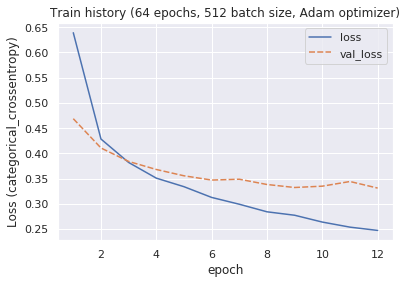

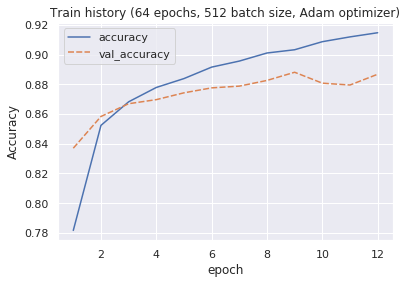

In [37]:
history, best_model = train(model, X_train, Y_train, X_val, Y_val)

In [38]:
strftime('%X')

'03:00:34'

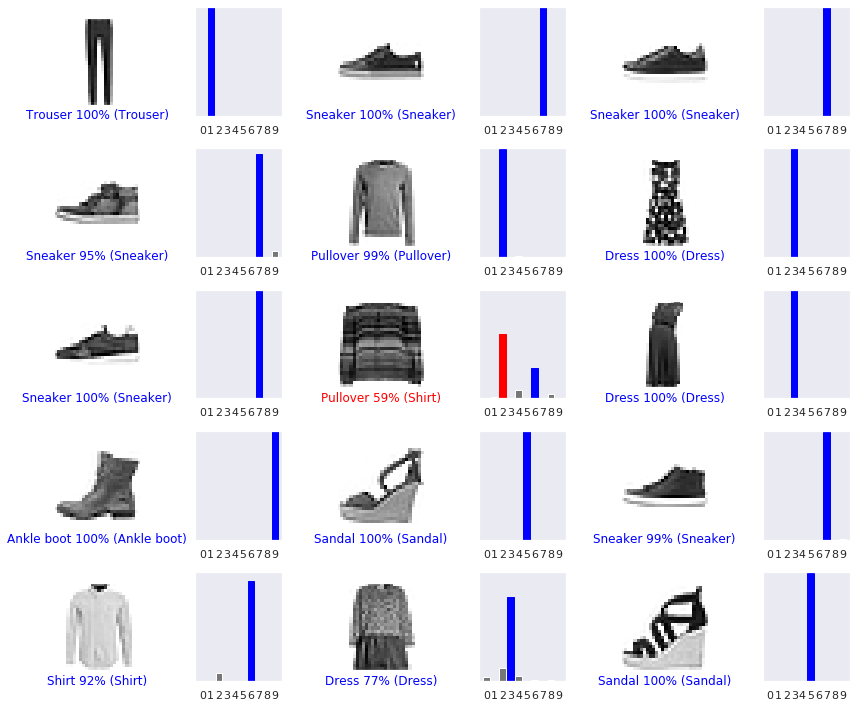

In [39]:
Y_val_pred = best_model.predict(X_val)
plot_image_with_prediction(X_val, ys_val, Y_val_pred)

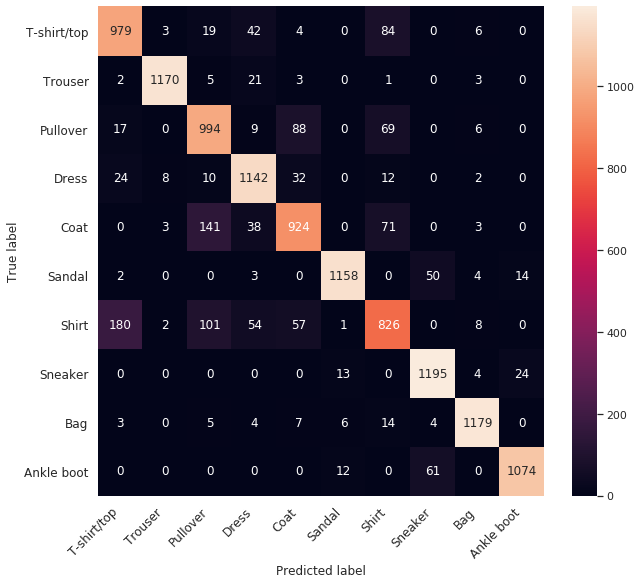

In [40]:
print_cm(ys_val, np.argmax(Y_val_pred, axis=1), CLASS_NAME)

### 1.2. CNN

In [0]:
# obs.: padding='valid' by default (i.e. no padding)
conv_model = keras.Sequential([
    Reshape((28, 28, 1), input_shape=(784,)),
    Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)), # 28x28 -> 14x14 feature map
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)), # 14x14 -> 7x7 feature map
    Flatten(), # 7*7*64 = 3136
    Dense(10, activation='softmax', kernel_regularizer=l2(0.001))
], "CNN_baseline")

In [0]:
conv_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [43]:
conv_model.summary()

Model: "CNN_baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [44]:
conv_model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

In [45]:
strftime('%X')

'03:00:41'

Starting to train...
Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 5s 99us/sample - loss: 0.7229 - accuracy: 0.7620 - val_loss: 0.4775 - val_accuracy: 0.8372
Epoch 2/64
48000/48000 [==============================] - 3s 60us/sample - loss: 0.4343 - accuracy: 0.8551 - val_loss: 0.4229 - val_accuracy: 0.8587
Epoch 3/64
48000/48000 [==============================] - 3s 55us/sample - loss: 0.3816 - accuracy: 0.8753 - val_loss: 0.3680 - val_accuracy: 0.8811
Epoch 4/64
48000/48000 [==============================] - 3s 54us/sample - loss: 0.3530 - accuracy: 0.8850 - val_loss: 0.3465 - val_accuracy: 0.8882
Epoch 5/64
48000/48000 [==============================] - 3s 58us/sample - loss: 0.3358 - accuracy: 0.8906 - val_loss: 0.3384 - val_accuracy: 0.8892
Epoch 6/64
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3197 - accuracy: 0.8971 - val_loss: 0.3280 - val_accuracy: 0.8925
Epoch 7/64
48000/48000 [===========

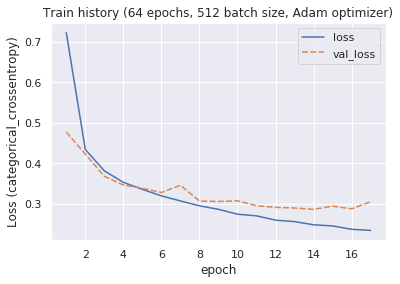

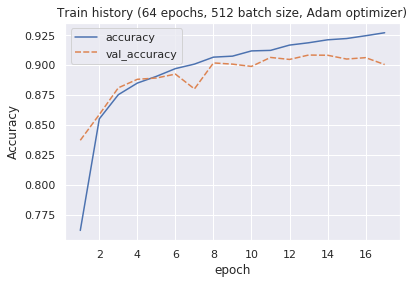

In [46]:
conv_history, best_conv_model = train(conv_model, X_train, Y_train, X_val, Y_val)

In [47]:
strftime('%X')

'03:01:30'

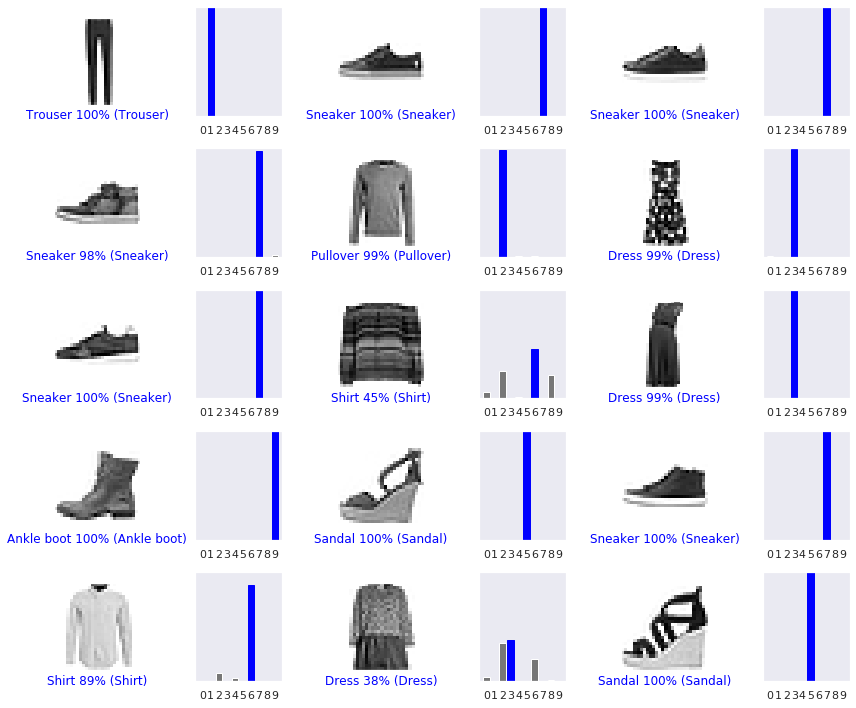

In [48]:
Y_val_conv_pred = best_conv_model.predict(X_val)
plot_image_with_prediction(X_val, ys_val, Y_val_conv_pred)

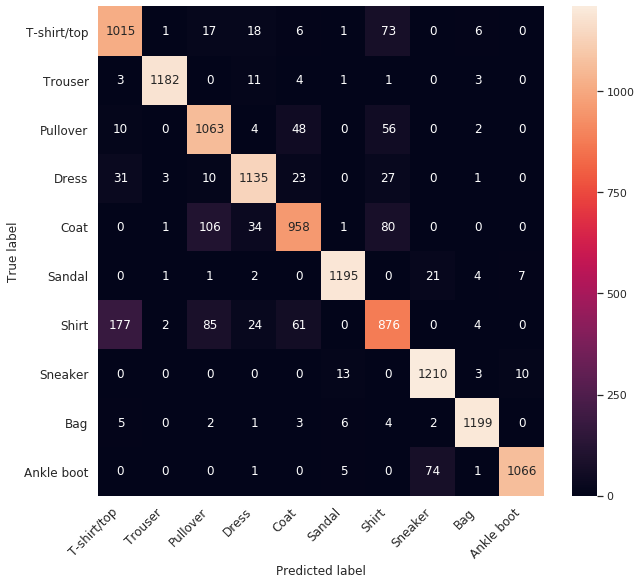

In [49]:
print_cm(ys_val, np.argmax(Y_val_conv_pred, axis=1), CLASS_NAME)

## 2. Using PCA
Re-do the ﬁrst experiment considering the PCA dimensionality reduction. Consider three diﬀerent energies (variance) for reducing the image dimensionality. What are the conclusions when using PCA in this problem? Does the accuracy improve?

In [0]:
from sklearn.decomposition import PCA

In [0]:
def print_info(array, name):
    print(f"{name+':':<9} {array.dtype.name:<7} {str(array.shape):<12} "
          f"| min: {array.min():>5.2f} | max: {array.max():>5.2f} "
          f"| mean: {array.mean():>5.3f} | std: {array.std():>5.3f}")

In [52]:
print_info(X_train, "X_train")
print_info(xs_train, "xs_train")
print_info(Y_train, "Y_train")
print_info(ys_train, "ys_train")

X_train:  float32 (48000, 784) | min: -0.81 | max:  2.02 | mean: 0.000 | std: 1.000
xs_train: float32 (48000, 784) | min:  0.00 | max:  1.00 | mean: 0.286 | std: 0.353
Y_train:  float64 (48000, 10)  | min:  0.00 | max:  1.00 | mean: 0.100 | std: 0.300
ys_train: int64   (48000,)     | min:  0.00 | max:  9.00 | mean: 4.495 | std: 2.879


_As we'll be reducing the amount of features (dimensions) of our input data after applying PCA, it makes more sense to treat it as a vector, instead of as an image.
Thus, we'll use our MLP baseline model instead of our CNN, even though the latter showed better results._

In [0]:
def build_pca_model(min_explained_variance, model_name):
    pca = PCA(min_explained_variance)
    pca.fit(X_train) # fit on train data (and then use it to transform both train and validation)
    print(pca)
    print()
    
    explained_variance = pca.explained_variance_ratio_.sum()
    print(f"{pca.n_components_} principal components → {explained_variance} explained variance")
    print(f"{pca.n_components_} / {X_train.shape[1]} = {(100 * pca.n_components_ / X_train.shape[1]):.2f}% of components used")
    
    model_pca = keras.Sequential([
        Input(shape=(pca.n_components_, )), # number of components used to keep min_explained_variance
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax', kernel_regularizer=l2(0.001))
    ], model_name)
    
    model_pca.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    
    return model_pca, pca

In [0]:
def train_pca_model(model_pca, pca):
    history_pca, best_model_pca = train(model_pca, 
                                        pca.transform(X_train), Y_train, 
                                        pca.transform(X_val), Y_val, 
                                        n_epochs=64, batch_size=512)

    # using ys_val below, instead of np.argmax(Y_val, axis=1), simply for convinence

    Y_val_pca_pred = best_model_pca.predict(pca.transform(X_val))
    plot_image_with_prediction(X_val, ys_val, Y_val_pca_pred)

    print_cm(ys_val, np.argmax(Y_val_pca_pred, axis=1), CLASS_NAME)
    
    return Y_val_pca_pred

### 2.1. 99% explained variance

In [55]:
model_99var, pca_99var = build_pca_model(min_explained_variance=0.99, model_name="MLP_99var")

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

458 principal components → 0.9900491237640381 explained variance
458 / 784 = 58.42% of components used


Starting to train...
Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 1s 26us/sample - loss: 0.7851 - accuracy: 0.7503 - val_loss: 0.4462 - val_accuracy: 0.8468
Epoch 2/64
48000/48000 [==============================] - 1s 14us/sample - loss: 0.3904 - accuracy: 0.8696 - val_loss: 0.3883 - val_accuracy: 0.8703
Epoch 3/64
48000/48000 [==============================] - 1s 13us/sample - loss: 0.3334 - accuracy: 0.8894 - val_loss: 0.3626 - val_accuracy: 0.8763
Epoch 4/64
48000/48000 [==============================] - 1s 14us/sample - loss: 0.2964 - accuracy: 0.9027 - val_loss: 0.3529 - val_accuracy: 0.8799
Epoch 5/64
48000/48000 [==============================] - 1s 14us/sample - loss: 0.2696 - accuracy: 0.9120 - val_loss: 0.3463 - val_accuracy: 0.8841
Epoch 6/64
48000/48000 [==============================] - 1s 14us/sample - loss: 0.2447 - accuracy: 0.9222 - val_loss: 0.3404 - val_accuracy: 0.8830
Epoch 7/64
48000/48000 [===========

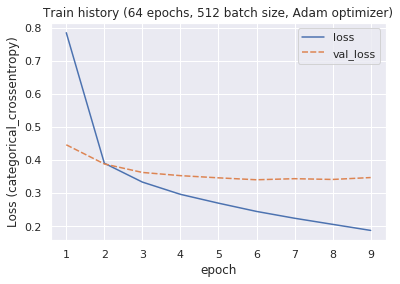

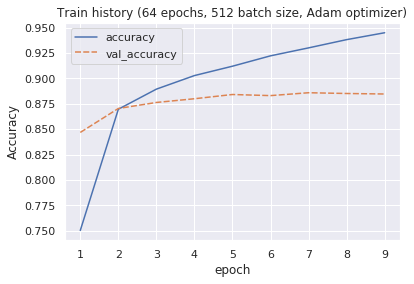

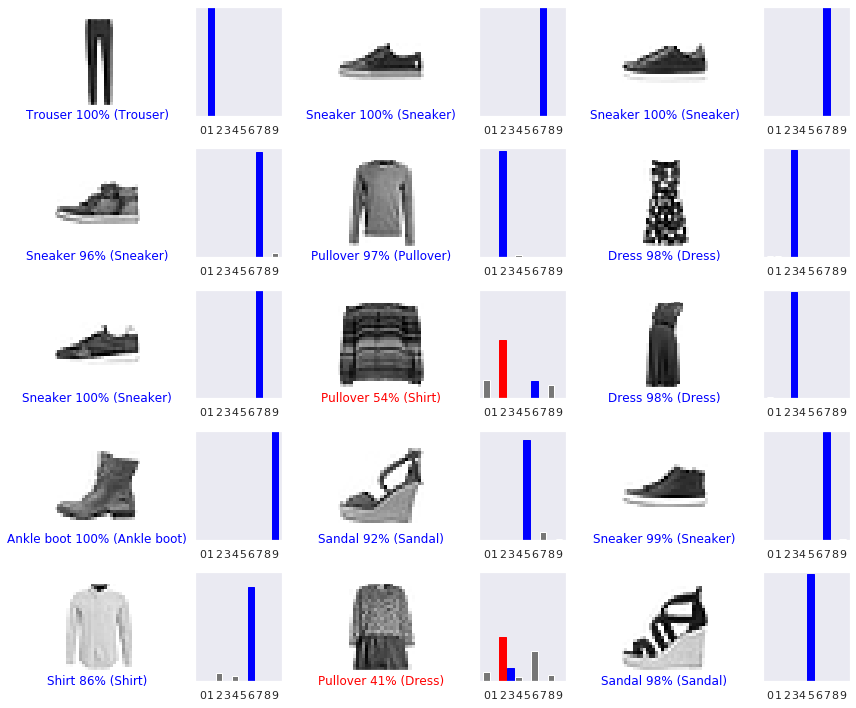

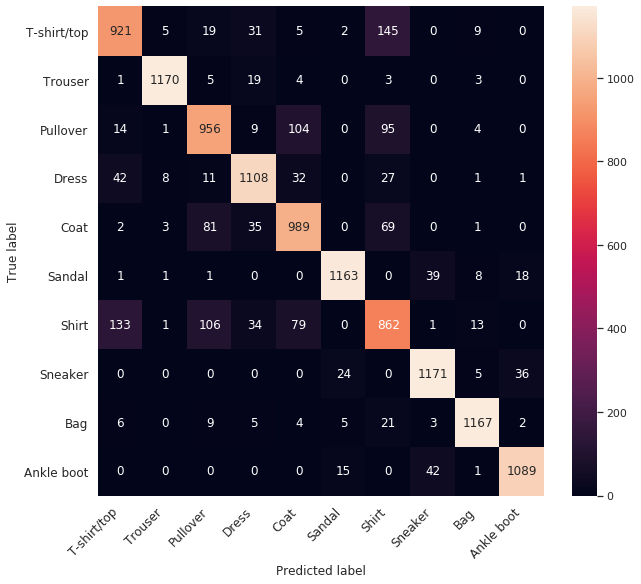

In [56]:
Y_val_99var_pred = train_pca_model(model_99var, pca_99var)

### 2.2. 95% explained variance

In [57]:
model_95var, pca_95var = build_pca_model(min_explained_variance=0.95, model_name="MLP_95var")

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

187 principal components → 0.9501577615737915 explained variance
187 / 784 = 23.85% of components used


Starting to train...
Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 1s 23us/sample - loss: 0.8160 - accuracy: 0.7353 - val_loss: 0.4663 - val_accuracy: 0.8453
Epoch 2/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.4167 - accuracy: 0.8583 - val_loss: 0.4043 - val_accuracy: 0.8611
Epoch 3/64
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3645 - accuracy: 0.8771 - val_loss: 0.3789 - val_accuracy: 0.8697
Epoch 4/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.3338 - accuracy: 0.8878 - val_loss: 0.3638 - val_accuracy: 0.8752
Epoch 5/64
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3113 - accuracy: 0.8948 - val_loss: 0.3524 - val_accuracy: 0.8800
Epoch 6/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.2924 - accuracy: 0.9018 - val_loss: 0.3426 - val_accuracy: 0.8817
Epoch 7/64
48000/48000 [===========

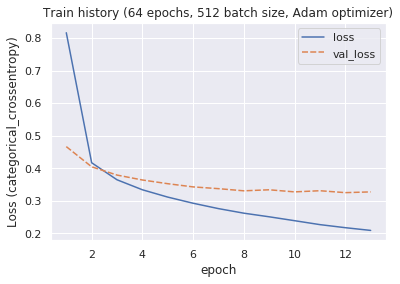

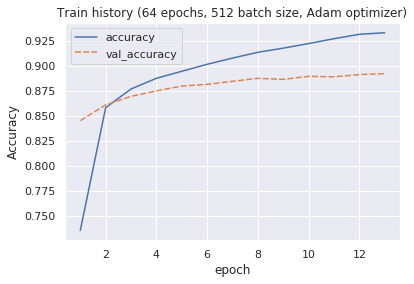

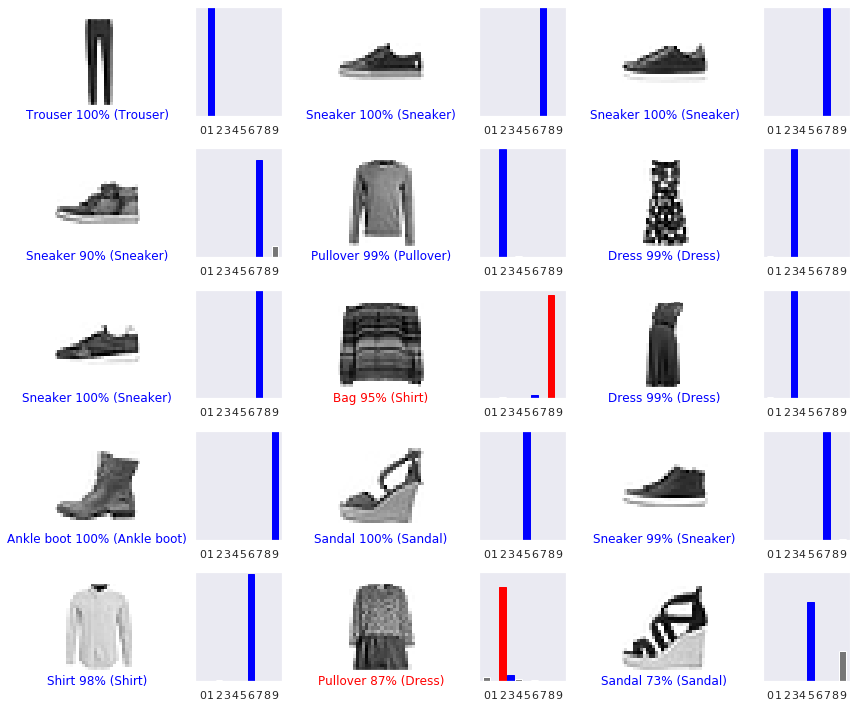

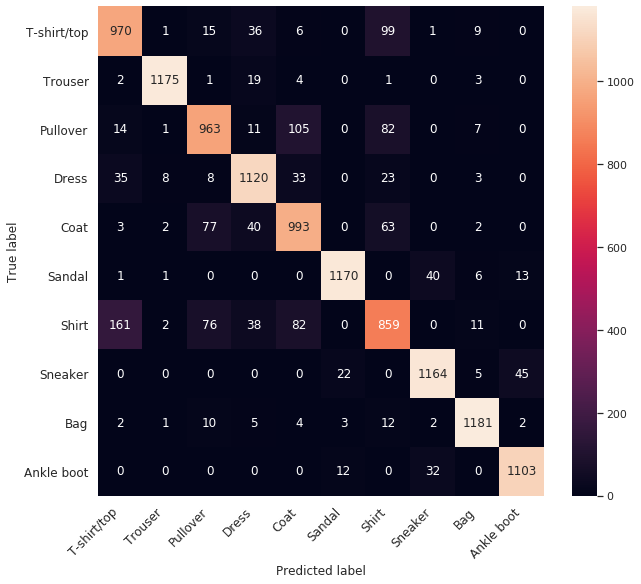

In [58]:
Y_val_95var_pred = train_pca_model(model_95var, pca_95var)

### 2.3. 90% explained variance

In [59]:
model_90var, pca_90var = build_pca_model(min_explained_variance=0.90, model_name="MLP_90var")

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

84 principal components → 0.9006989598274231 explained variance
84 / 784 = 10.71% of components used


Starting to train...
Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 2s 38us/sample - loss: 0.8200 - accuracy: 0.7312 - val_loss: 0.4874 - val_accuracy: 0.8356
Epoch 2/64
48000/48000 [==============================] - 1s 15us/sample - loss: 0.4436 - accuracy: 0.8502 - val_loss: 0.4245 - val_accuracy: 0.8544
Epoch 3/64
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3948 - accuracy: 0.8654 - val_loss: 0.3979 - val_accuracy: 0.8664
Epoch 4/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.3657 - accuracy: 0.8754 - val_loss: 0.3821 - val_accuracy: 0.8688
Epoch 5/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.3472 - accuracy: 0.8813 - val_loss: 0.3654 - val_accuracy: 0.8765
Epoch 6/64
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3304 - accuracy: 0.8882 - val_loss: 0.3592 - val_accuracy: 0.8761
Epoch 7/64
48000/48000 [===========

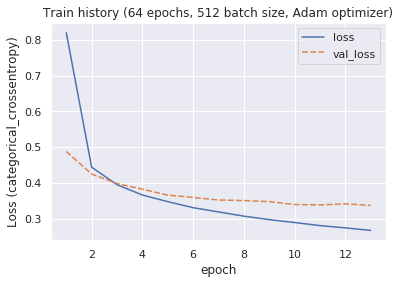

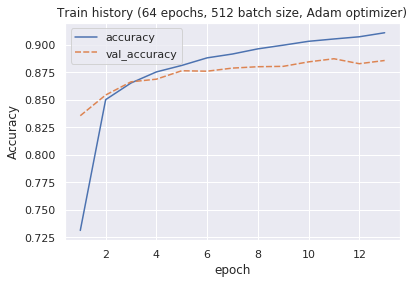

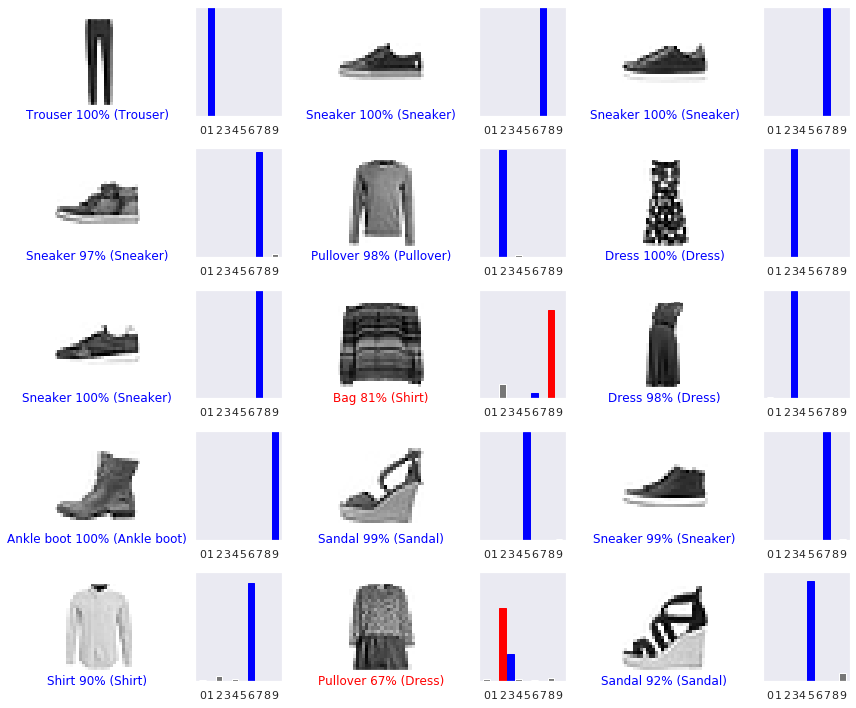

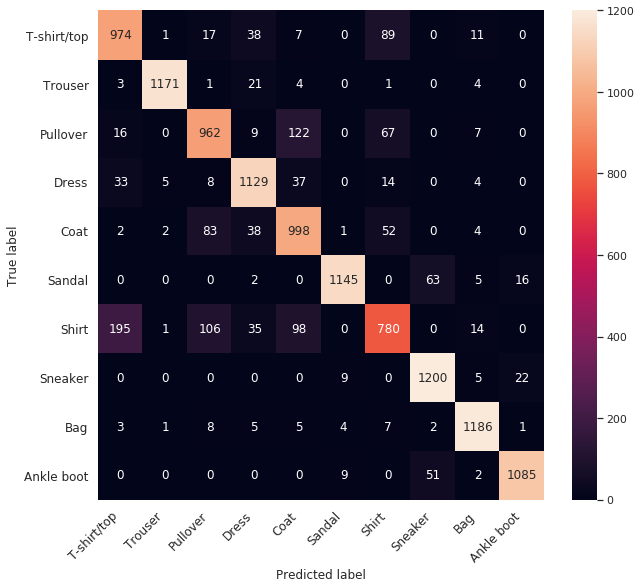

In [60]:
Y_val_90var_pred = train_pca_model(model_90var, pca_90var)

### 2.4. F1-scores

In [0]:
from sklearn.metrics import precision_recall_fscore_support

In [0]:
def print_f1_scores(ys, ys_pred, class_name_dict=CLASS_NAME):
    # ref.: https://github.com/erikperillo/ml-2sem2019/
    def harmonic_mean_of_positive_values(values, eps=1e-18):
        return len(values) / sum(1 / max(v, eps) for v in values)
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(ys, ys_pred)
    print("                       Precision    Recall    F1-score")
    for i, (p, r, f1) in enumerate(zip(precision, recall, f1_score)):
        print(f"Class {i} {f'({class_name_dict[i]}):':<16} {p:.4f}  |  {r:.4f}  |  {f1:.4f}")
    print()
    print(f"Combined F1 score:  {len(f1_score) / sum(1 / max(v, 1e-18) for v in f1_score):.4f}")
    print(f"Combined Precision: {len(precision) / sum(1 / max(v, 1e-18) for v in precision):.4f}")
    print(f"Combined Recall:    {len(recall) / sum(1 / max(v, 1e-18) for v in recall):.4f}")

In [63]:
# MLP baseline
print_f1_scores(ys_val, np.argmax(Y_val_pred, axis=1), CLASS_NAME)

                       Precision    Recall    F1-score
Class 0 (T-shirt/top):   0.8111  |  0.8610  |  0.8353
Class 1 (Trouser):       0.9865  |  0.9710  |  0.9787
Class 2 (Pullover):      0.7796  |  0.8402  |  0.8088
Class 3 (Dress):         0.8698  |  0.9285  |  0.8982
Class 4 (Coat):          0.8287  |  0.7831  |  0.8052
Class 5 (Sandal):        0.9731  |  0.9407  |  0.9566
Class 6 (Shirt):         0.7669  |  0.6721  |  0.7164
Class 7 (Sneaker):       0.9122  |  0.9668  |  0.9387
Class 8 (Bag):           0.9704  |  0.9648  |  0.9676
Class 9 (Ankle boot):    0.9658  |  0.9364  |  0.9509

Combined F1 score:  0.8770
Combined Precision: 0.8788
Combined Recall:    0.8753


In [64]:
# CNN baseline
print_f1_scores(ys_val, np.argmax(Y_val_conv_pred, axis=1), CLASS_NAME)

                       Precision    Recall    F1-score
Class 0 (T-shirt/top):   0.8179  |  0.8927  |  0.8537
Class 1 (Trouser):       0.9933  |  0.9809  |  0.9871
Class 2 (Pullover):      0.8279  |  0.8986  |  0.8618
Class 3 (Dress):         0.9228  |  0.9228  |  0.9228
Class 4 (Coat):          0.8685  |  0.8119  |  0.8392
Class 5 (Sandal):        0.9779  |  0.9708  |  0.9743
Class 6 (Shirt):         0.7842  |  0.7128  |  0.7468
Class 7 (Sneaker):       0.9258  |  0.9790  |  0.9516
Class 8 (Bag):           0.9804  |  0.9812  |  0.9808
Class 9 (Ankle boot):    0.9843  |  0.9294  |  0.9561

Combined F1 score:  0.9007
Combined Precision: 0.9020
Combined Recall:    0.8995


In [65]:
# 99% explained variance
print_f1_scores(ys_val, np.argmax(Y_val_99var_pred, axis=1), CLASS_NAME) # FIXME why is this worse than 95% ?

                       Precision    Recall    F1-score
Class 0 (T-shirt/top):   0.8223  |  0.8100  |  0.8161
Class 1 (Trouser):       0.9840  |  0.9710  |  0.9774
Class 2 (Pullover):      0.8047  |  0.8081  |  0.8064
Class 3 (Dress):         0.8928  |  0.9008  |  0.8968
Class 4 (Coat):          0.8127  |  0.8381  |  0.8252
Class 5 (Sandal):        0.9620  |  0.9448  |  0.9533
Class 6 (Shirt):         0.7054  |  0.7014  |  0.7034
Class 7 (Sneaker):       0.9323  |  0.9474  |  0.9398
Class 8 (Bag):           0.9629  |  0.9550  |  0.9589
Class 9 (Ankle boot):    0.9503  |  0.9494  |  0.9498

Combined F1 score:  0.8737
Combined Precision: 0.8736
Combined Recall:    0.8737


In [66]:
# 95% explained variance
print_f1_scores(ys_val, np.argmax(Y_val_95var_pred, axis=1), CLASS_NAME)

                       Precision    Recall    F1-score
Class 0 (T-shirt/top):   0.8165  |  0.8531  |  0.8344
Class 1 (Trouser):       0.9866  |  0.9751  |  0.9808
Class 2 (Pullover):      0.8374  |  0.8140  |  0.8255
Class 3 (Dress):         0.8826  |  0.9106  |  0.8964
Class 4 (Coat):          0.8093  |  0.8415  |  0.8251
Class 5 (Sandal):        0.9693  |  0.9504  |  0.9598
Class 6 (Shirt):         0.7542  |  0.6989  |  0.7255
Class 7 (Sneaker):       0.9395  |  0.9417  |  0.9406
Class 8 (Bag):           0.9625  |  0.9664  |  0.9645
Class 9 (Ankle boot):    0.9484  |  0.9616  |  0.9550

Combined F1 score:  0.8831
Combined Precision: 0.8837
Combined Recall:    0.8825


In [67]:
# 90% explained variance
print_f1_scores(ys_val, np.argmax(Y_val_90var_pred, axis=1), CLASS_NAME)

                       Precision    Recall    F1-score
Class 0 (T-shirt/top):   0.7945  |  0.8566  |  0.8244
Class 1 (Trouser):       0.9915  |  0.9718  |  0.9816
Class 2 (Pullover):      0.8118  |  0.8132  |  0.8125
Class 3 (Dress):         0.8841  |  0.9179  |  0.9007
Class 4 (Coat):          0.7852  |  0.8458  |  0.8144
Class 5 (Sandal):        0.9803  |  0.9301  |  0.9546
Class 6 (Shirt):         0.7723  |  0.6347  |  0.6967
Class 7 (Sneaker):       0.9119  |  0.9709  |  0.9404
Class 8 (Bag):           0.9549  |  0.9705  |  0.9627
Class 9 (Ankle boot):    0.9653  |  0.9459  |  0.9555

Combined F1 score:  0.8747
Combined Precision: 0.8773
Combined Recall:    0.8721


### 2.4. <90% explained variance

### 2.4.1. 80% explained variance

In [68]:
model_80var, pca_80var = build_pca_model(min_explained_variance=0.80, model_name="MLP_80var")

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

24 principal components → 0.8008705377578735 explained variance
24 / 784 = 3.06% of components used


Starting to train...
Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 2s 34us/sample - loss: 0.9276 - accuracy: 0.6976 - val_loss: 0.5558 - val_accuracy: 0.8042
Epoch 2/64
48000/48000 [==============================] - 1s 12us/sample - loss: 0.5114 - accuracy: 0.8242 - val_loss: 0.4878 - val_accuracy: 0.8305
Epoch 3/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.4627 - accuracy: 0.8404 - val_loss: 0.4589 - val_accuracy: 0.8388
Epoch 4/64
48000/48000 [==============================] - 1s 12us/sample - loss: 0.4367 - accuracy: 0.8485 - val_loss: 0.4387 - val_accuracy: 0.8476
Epoch 5/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.4188 - accuracy: 0.8556 - val_loss: 0.4293 - val_accuracy: 0.8518
Epoch 6/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.4045 - accuracy: 0.8601 - val_loss: 0.4191 - val_accuracy: 0.8533
Epoch 7/64
48000/48000 [===========

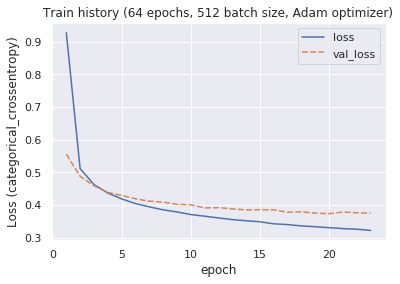

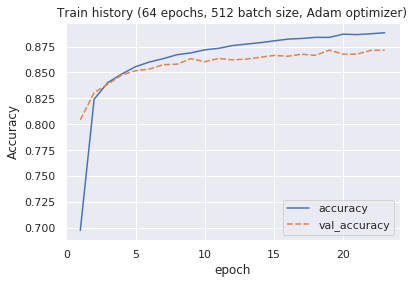

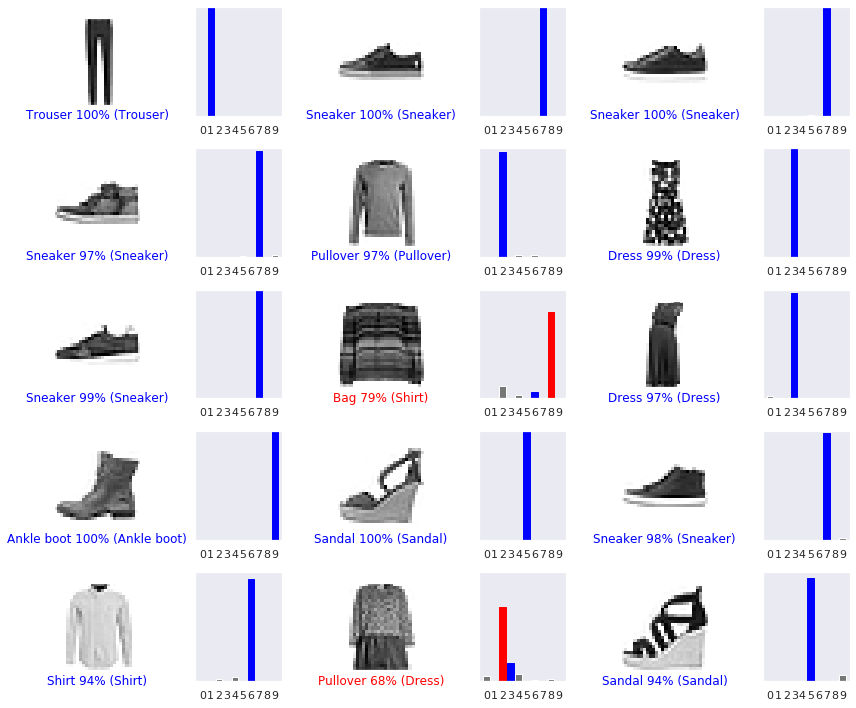

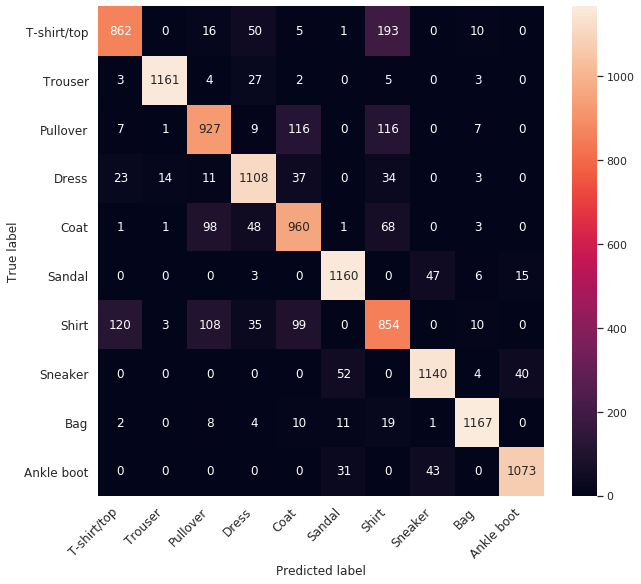

In [69]:
Y_val_80var_pred = train_pca_model(model_80var, pca_80var)

In [70]:
print_f1_scores(ys_val, np.argmax(Y_val_80var_pred, axis=1), CLASS_NAME)

                       Precision    Recall    F1-score
Class 0 (T-shirt/top):   0.8468  |  0.7581  |  0.8000
Class 1 (Trouser):       0.9839  |  0.9635  |  0.9736
Class 2 (Pullover):      0.7910  |  0.7836  |  0.7873
Class 3 (Dress):         0.8629  |  0.9008  |  0.8815
Class 4 (Coat):          0.7811  |  0.8136  |  0.7970
Class 5 (Sandal):        0.9236  |  0.9423  |  0.9329
Class 6 (Shirt):         0.6625  |  0.6949  |  0.6783
Class 7 (Sneaker):       0.9261  |  0.9223  |  0.9242
Class 8 (Bag):           0.9621  |  0.9550  |  0.9585
Class 9 (Ankle boot):    0.9512  |  0.9355  |  0.9433

Combined F1 score:  0.8570
Combined Precision: 0.8574
Combined Recall:    0.8567


### 2.4.2. 60% explained variance

In [71]:
model_60var, pca_60var = build_pca_model(min_explained_variance=0.60, model_name="MLP_60var")

PCA(copy=True, iterated_power='auto', n_components=0.6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

5 principal components → 0.6156876087188721 explained variance
5 / 784 = 0.64% of components used


Starting to train...
Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 1s 30us/sample - loss: 1.0809 - accuracy: 0.6303 - val_loss: 0.7995 - val_accuracy: 0.7019
Epoch 2/64
48000/48000 [==============================] - 1s 15us/sample - loss: 0.7653 - accuracy: 0.7116 - val_loss: 0.7483 - val_accuracy: 0.7141
Epoch 3/64
48000/48000 [==============================] - 1s 15us/sample - loss: 0.7309 - accuracy: 0.7215 - val_loss: 0.7222 - val_accuracy: 0.7247
Epoch 4/64
48000/48000 [==============================] - 1s 14us/sample - loss: 0.7122 - accuracy: 0.7285 - val_loss: 0.7078 - val_accuracy: 0.7292
Epoch 5/64
48000/48000 [==============================] - 1s 15us/sample - loss: 0.7012 - accuracy: 0.7324 - val_loss: 0.7010 - val_accuracy: 0.7268
Epoch 6/64
48000/48000 [==============================] - 1s 15us/sample - loss: 0.6924 - accuracy: 0.7340 - val_loss: 0.6951 - val_accuracy: 0.7311
Epoch 7/64
48000/48000 [===========

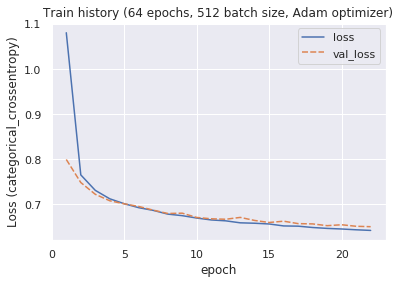

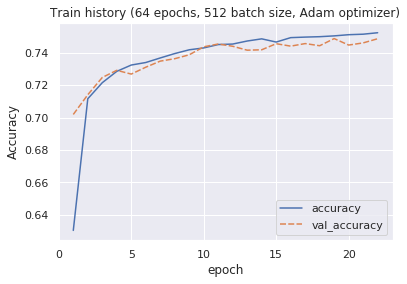

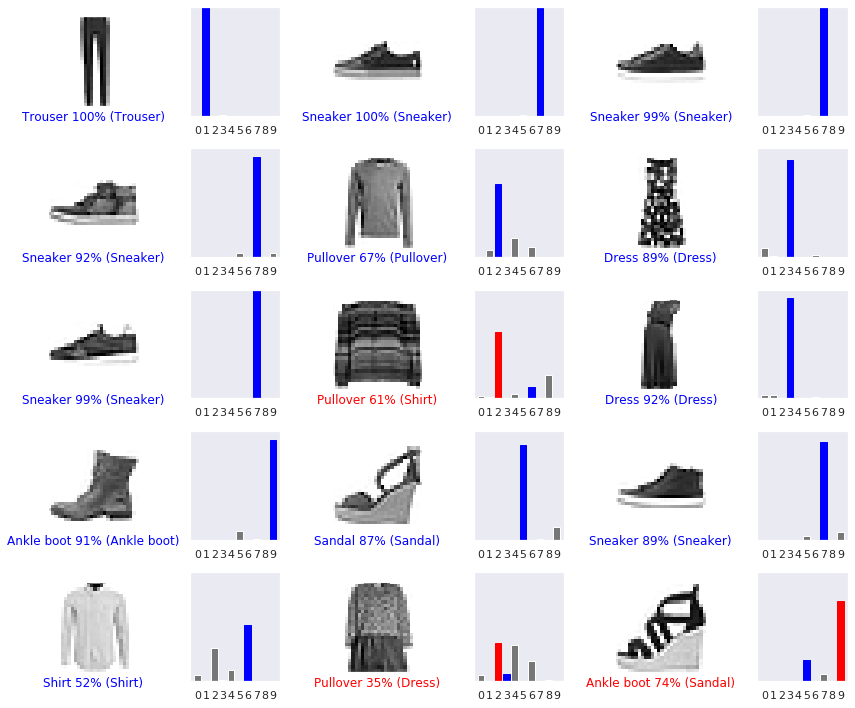

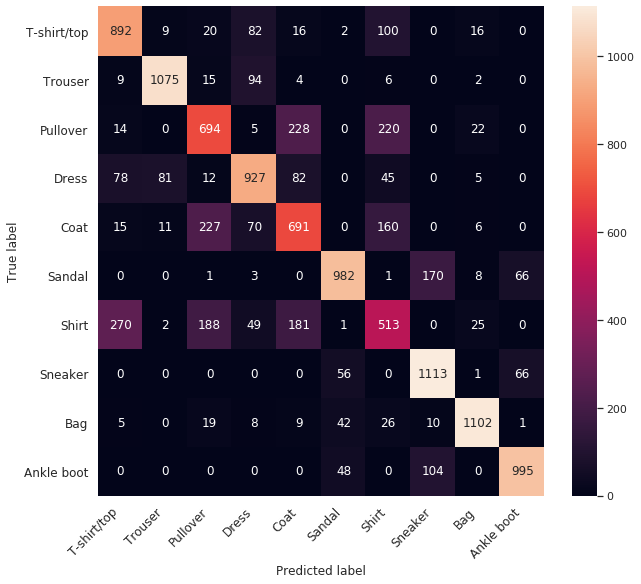

In [72]:
Y_val_60var_pred = train_pca_model(model_60var, pca_60var)

In [73]:
# 60% explained variance
print_f1_scores(ys_val, np.argmax(Y_val_60var_pred, axis=1), CLASS_NAME)

                       Precision    Recall    F1-score
Class 0 (T-shirt/top):   0.6952  |  0.7845  |  0.7372
Class 1 (Trouser):       0.9126  |  0.8921  |  0.9022
Class 2 (Pullover):      0.5901  |  0.5866  |  0.5884
Class 3 (Dress):         0.7488  |  0.7537  |  0.7512
Class 4 (Coat):          0.5706  |  0.5856  |  0.5780
Class 5 (Sandal):        0.8683  |  0.7977  |  0.8315
Class 6 (Shirt):         0.4790  |  0.4174  |  0.4461
Class 7 (Sneaker):       0.7967  |  0.9005  |  0.8454
Class 8 (Bag):           0.9284  |  0.9018  |  0.9149
Class 9 (Ankle boot):    0.8821  |  0.8675  |  0.8747

Combined F1 score:  0.7098
Combined Precision: 0.7132
Combined Recall:    0.7064


### 2.5. Plot the first 3 principal components

In [0]:
pca_3pc = PCA(n_components=3)

In [0]:
pca_3pc_result = pca_3pc.fit_transform(X_train)

In [76]:
print(f"Explained variance per principal component:")
for i, (var, cumsum) in enumerate(zip(pca_3pc.explained_variance_ratio_, np.cumsum(pca_3pc.explained_variance_ratio_))):
    print(f"PC {i+1}: {var:.4f} (cumulative sum: {cumsum:.2f})")

Explained variance per principal component:
PC 1: 0.2896 (cumulative sum: 0.29)
PC 2: 0.1775 (cumulative sum: 0.47)
PC 3: 0.0606 (cumulative sum: 0.53)


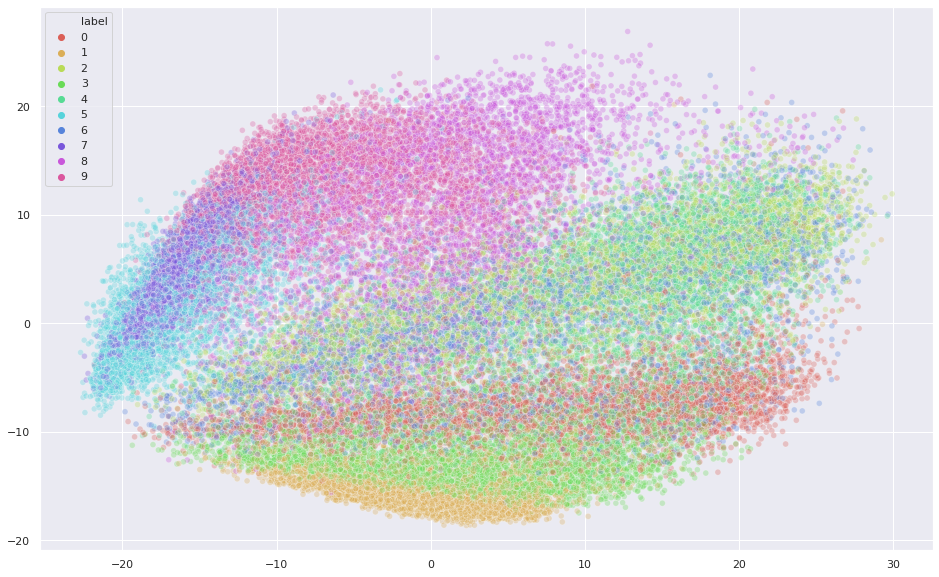

In [77]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=pca_3pc_result[..., 0], # PC 1
    y=pca_3pc_result[..., 1], # PC 2
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=train_dataset,
    legend="full",
    alpha=0.3
)

In [0]:
from mpl_toolkits.mplot3d import Axes3D

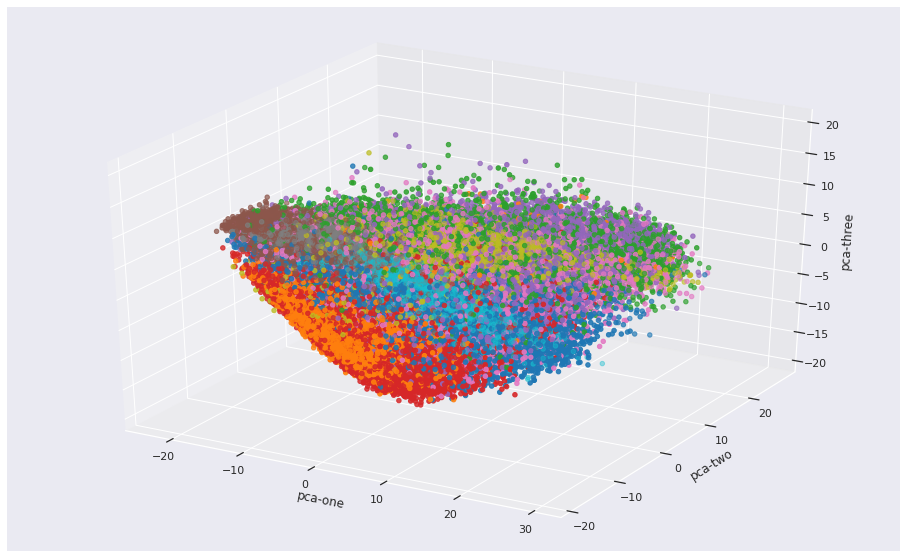

In [79]:
# run '%matplotlib notebook' for an interactive (but laggy) visualization
ax = plt.figure(figsize=(16, 10)).gca(projection='3d')
ax.scatter(
    xs=pca_3pc_result[..., 0], # PC 1
    ys=pca_3pc_result[..., 1], # PC 2
    zs=pca_3pc_result[..., 2], # PC 3
    c=ys_train, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## 3. Using Autoencoders
Re-do the ﬁrst experiment considering Autoencoders for reducing the image dimensionality. Consider two diﬀerent latent vector size for reducing the image dimensionality. What are the conclusions when using Autoencoders in this problem? Does accuracy improve?

Autoencoders are a branch of neural network which attempt to compress the information of the input variables into a reduced dimensional space and then recreate the input data set. Typically the autoencoder is trained over a number of iterations using gradient descent, minimizing the mean squared error. The key component is the “bottleneck” hidden layer. This is where the information from the input has been compressed. By extracting this layer from the model, each node can now be treated as a variable in the same way each chosen principal component is used as a variable in following models.


In [0]:
from tensorflow.keras import Model
# ref.: https://blog.keras.io/building-autoencoders-in-keras.html
#       https://www.tensorflow.org/tutorials/generative/cvae

In [0]:
def build_autoencoder(latent_dim):
    __input   = Input(shape=(784,)) # 28 * 28 = 784 pixels
    __encoded = Dense(latent_dim, activation='relu', activity_regularizer=l1(1e-4))(__input)
    __decoded = Dense(784, activation='sigmoid')(__encoded)

    autoencoder = Model(__input, __decoded)
    print("\nAutoencoder summary:")
    print(autoencoder.summary())

    encoder = Model(__input, __encoded)
    print("\nEncoder summary:")
    print(encoder.summary())

    # create a placeholder for an encoded (24-dimensional) input
    encoded_input = Input(shape=(latent_dim,))
    # retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]

    decoder = Model(encoded_input, decoder_layer(encoded_input))
    print("\nDecoder summary:")
    print(decoder.summary())

    autoencoder.compile(optimizer='adam', loss='mse')

    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.003, patience=3)]

    autoencoder.fit(X_train, X_train,
                    validation_data=(X_val, X_val),
                    epochs=MAX_EPOCHS,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    callbacks=callbacks,
                    verbose=TF_VERBOSE)
    return autoencoder, encoder, decoder

In [0]:
def show_autoencoder_samples(encoder, decoder):
    encoded_imgs = encoder.predict(X_val)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_val[i].reshape(28, 28), cmap='binary')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='binary')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [0]:
def train_ae_model(encoder, latent_dim, model_name):
    model = keras.Sequential([
        Input(shape=(latent_dim, )), # number of components used to keep min_explained_variance
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax', kernel_regularizer=l2(0.001))
    ], model_name)

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    history_ae, best_model_ae = train(model, 
                                      encoder.predict(X_train), Y_train, 
                                      encoder.predict(X_val), Y_val)

    # using ys_val below, instead of np.argmax(Y_val, axis=1), simply for convinence

    Y_val_ae_pred = best_model_ae.predict(encoder.predict(X_val))
    plot_image_with_prediction(X_val, ys_val, Y_val_ae_pred)

    print_cm(ys_val, np.argmax(Y_val_ae_pred, axis=1), CLASS_NAME)
    
    return Y_val_ae_pred, best_model_ae

### 3.1. Latent vector size of 84

In [0]:
latent_dim = 84

In [85]:
autoencoder_84, encoder_84, decoder_84 = build_autoencoder(latent_dim)


Autoencoder summary:
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_19 (Dense)             (None, 84)                65940     
_________________________________________________________________
dense_20 (Dense)             (None, 784)               66640     
Total params: 132,580
Trainable params: 132,580
Non-trainable params: 0
_________________________________________________________________
None

Encoder summary:
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_19 (Dense)             (None, 84)                6594

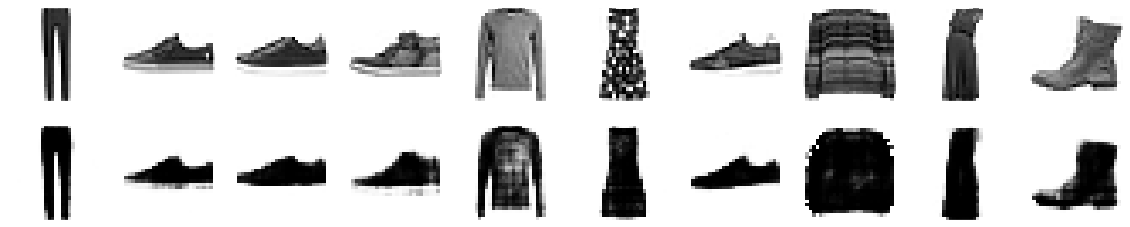

In [86]:
show_autoencoder_samples(encoder_84, decoder_84)

Starting to train...
Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 1s 23us/sample - loss: 0.8587 - accuracy: 0.7090 - val_loss: 0.5148 - val_accuracy: 0.8172
Epoch 2/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.4751 - accuracy: 0.8363 - val_loss: 0.4456 - val_accuracy: 0.8443
Epoch 3/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.4277 - accuracy: 0.8512 - val_loss: 0.4270 - val_accuracy: 0.8498
Epoch 4/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.3991 - accuracy: 0.8626 - val_loss: 0.4038 - val_accuracy: 0.8590
Epoch 5/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.3788 - accuracy: 0.8694 - val_loss: 0.3906 - val_accuracy: 0.8652
Epoch 6/64
48000/48000 [==============================] - 1s 10us/sample - loss: 0.3662 - accuracy: 0.8744 - val_loss: 0.3873 - val_accuracy: 0.8656
Epoch 7/64
48000/48000 [===========

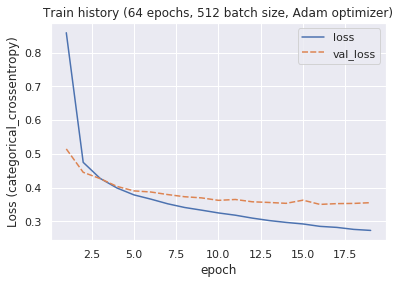

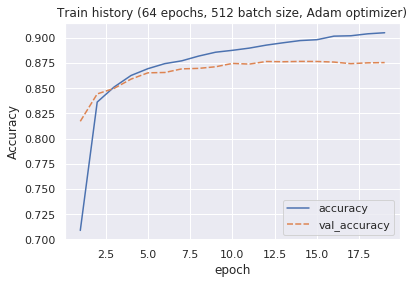

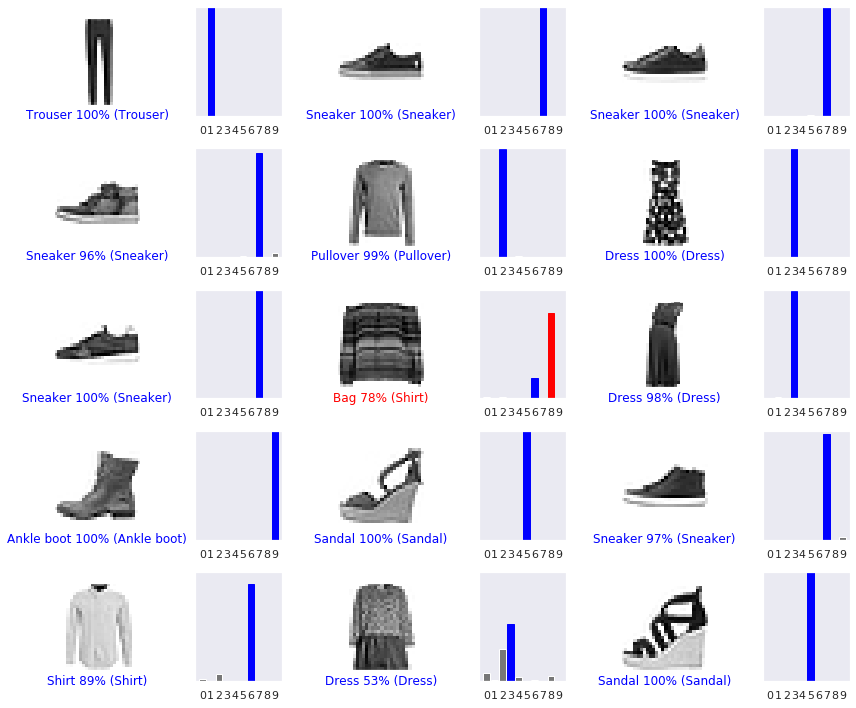

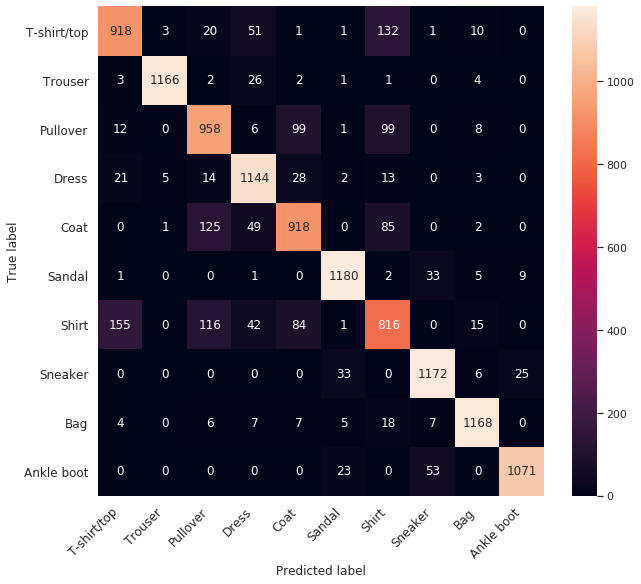

In [87]:
Y_val_ae_84_pred, model_ae_84 = train_ae_model(encoder_84, latent_dim, model_name="AE_84")

In [88]:
print_f1_scores(ys_val, np.argmax(Y_val_ae_84_pred, axis=1), CLASS_NAME)

                       Precision    Recall    F1-score
Class 0 (T-shirt/top):   0.8241  |  0.8074  |  0.8156
Class 1 (Trouser):       0.9923  |  0.9676  |  0.9798
Class 2 (Pullover):      0.7720  |  0.8098  |  0.7904
Class 3 (Dress):         0.8627  |  0.9301  |  0.8951
Class 4 (Coat):          0.8060  |  0.7780  |  0.7917
Class 5 (Sandal):        0.9463  |  0.9586  |  0.9524
Class 6 (Shirt):         0.6998  |  0.6640  |  0.6814
Class 7 (Sneaker):       0.9258  |  0.9482  |  0.9369
Class 8 (Bag):           0.9566  |  0.9558  |  0.9562
Class 9 (Ankle boot):    0.9692  |  0.9337  |  0.9512

Combined F1 score:  0.8640
Combined Precision: 0.8651
Combined Recall:    0.8629


### 3.2. Latent vector size of 24

In [0]:
latent_dim = 24

In [90]:
autoencoder_24, encoder_24, decoder_24 = build_autoencoder(latent_dim)


Autoencoder summary:
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 24)                18840     
_________________________________________________________________
dense_25 (Dense)             (None, 784)               19600     
Total params: 38,440
Trainable params: 38,440
Non-trainable params: 0
_________________________________________________________________
None

Encoder summary:
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 24)                1884

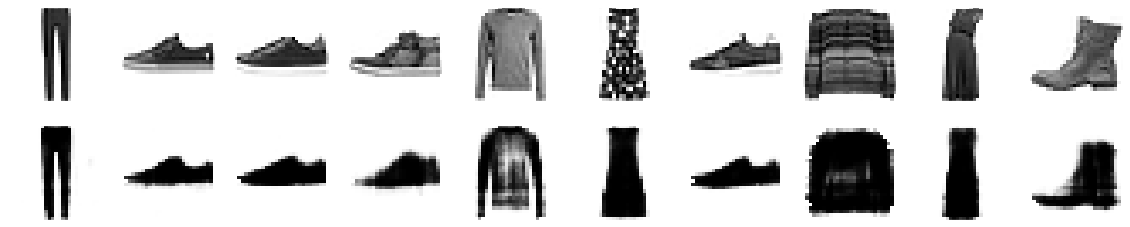

In [91]:
show_autoencoder_samples(encoder_24, decoder_24)

Starting to train...
Train on 48000 samples, validate on 12000 samples
Epoch 1/64
48000/48000 [==============================] - 1s 24us/sample - loss: 1.0128 - accuracy: 0.6774 - val_loss: 0.5806 - val_accuracy: 0.7985
Epoch 2/64
48000/48000 [==============================] - 1s 11us/sample - loss: 0.5348 - accuracy: 0.8161 - val_loss: 0.5065 - val_accuracy: 0.8242
Epoch 3/64
48000/48000 [==============================] - 1s 12us/sample - loss: 0.4864 - accuracy: 0.8321 - val_loss: 0.4839 - val_accuracy: 0.8284
Epoch 4/64
48000/48000 [==============================] - 1s 12us/sample - loss: 0.4618 - accuracy: 0.8408 - val_loss: 0.4670 - val_accuracy: 0.8367
Epoch 5/64
48000/48000 [==============================] - 1s 12us/sample - loss: 0.4446 - accuracy: 0.8454 - val_loss: 0.4490 - val_accuracy: 0.8453
Epoch 6/64
48000/48000 [==============================] - 1s 12us/sample - loss: 0.4315 - accuracy: 0.8506 - val_loss: 0.4413 - val_accuracy: 0.8490
Epoch 7/64
48000/48000 [===========

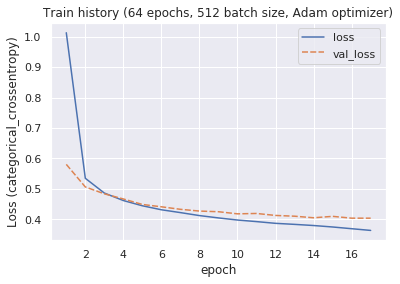

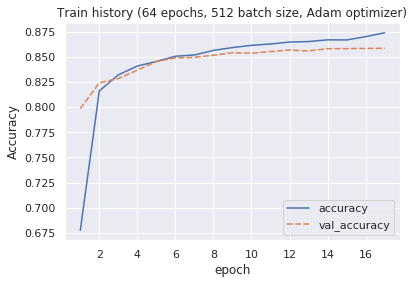

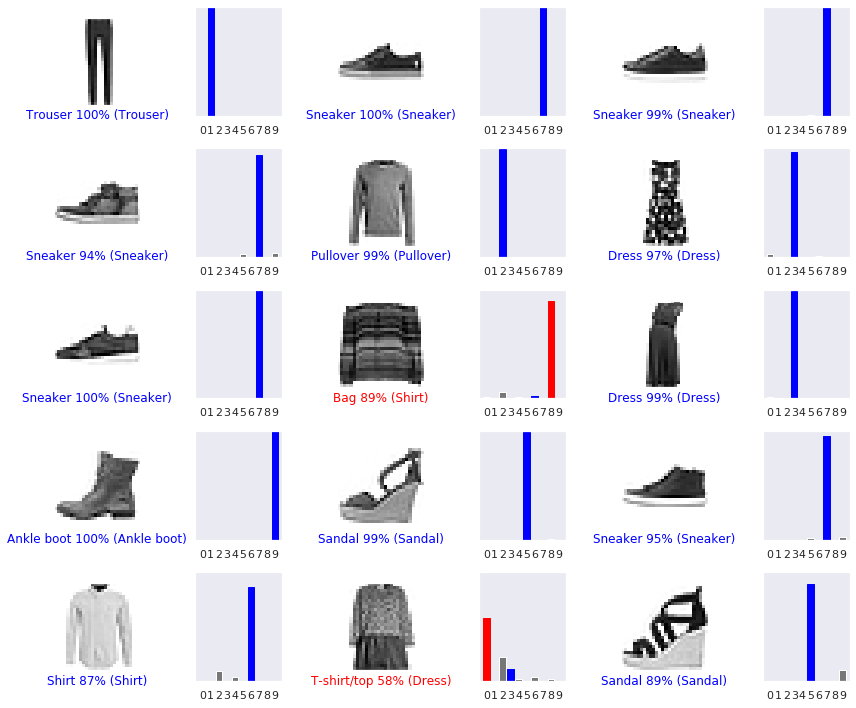

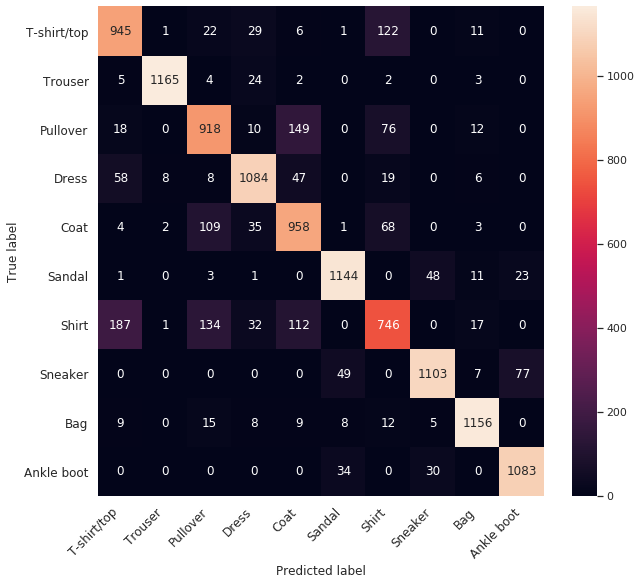

In [92]:
Y_val_ae_24_pred, model_ae_24 = train_ae_model(encoder_24, latent_dim, model_name="AE_24")

In [93]:
print_f1_scores(ys_val, np.argmax(Y_val_ae_24_pred, axis=1), CLASS_NAME)

                       Precision    Recall    F1-score
Class 0 (T-shirt/top):   0.7702  |  0.8311  |  0.7995
Class 1 (Trouser):       0.9898  |  0.9668  |  0.9782
Class 2 (Pullover):      0.7568  |  0.7760  |  0.7663
Class 3 (Dress):         0.8863  |  0.8813  |  0.8838
Class 4 (Coat):          0.7467  |  0.8119  |  0.7779
Class 5 (Sandal):        0.9248  |  0.9293  |  0.9271
Class 6 (Shirt):         0.7139  |  0.6070  |  0.6561
Class 7 (Sneaker):       0.9300  |  0.8924  |  0.9108
Class 8 (Bag):           0.9429  |  0.9460  |  0.9444
Class 9 (Ankle boot):    0.9155  |  0.9442  |  0.9296

Combined F1 score:  0.8453
Combined Precision: 0.8469
Combined Recall:    0.8437


## 4. Using clustering techniques
Explore two clustering algorithms using the reduced features (PCA or Autoencoders). Do the clusters make sense? Check the validity/quality of your clusters.

In [0]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

In [0]:
def show_clusters(clusters, data):
    print("Clusters:", set(clusters.labels_))

    print("Adjusted Rand Score:", adjusted_rand_score(ys_val, clusters.labels_))

    labels = clusters.labels_.astype(float)
    # we select the first two feature columns for plotting in 2D
    __xs, __ys = data[..., 0], data[..., 1]

    try:
        centroids = clusters.cluster_centers_ # K-Means
        __xc, __yc = centroids[..., 0], centroids[..., 1]
    except:
        centroids = None

    # plt.scatter(x=__xs, y=__ys, c=labels, s=50, alpha=0.8, cmap="viridis")
    # plt.scatter(__xc, __yc, marker='+', s=169, linewidths=3, color='red', zorder=10)
    
    plt.figure(figsize=(16, 10))
    sns.scatterplot(x=__xs, y=__ys, 
                    hue=labels, palette=sns.color_palette("hls", 10), legend="full", alpha=0.3)
    if centroids is not None:
        sns.scatterplot(x=__xc, y=__yc, 
                        marker='+', s=175, linewidths=3, color='black', zorder=10)
    plt.show()

Let's standardize the features we'll be using for clustering with Z-score:

In [98]:
reduced_features_list = [("X_val_80var", pca_80var.transform(X_val)), ("X_val_90var", pca_90var.transform(X_val))]
                      # [("X_val_ae_24", encoder_24.predict(X_val)), ("X_val_ae_84", encoder_84.predict(X_val))]
reduced_features_zscore = []
for name, reduced_features in reduced_features_list:
    print(f"{name+':':<19} {str(reduced_features.shape):<11} "
          f"| min: {reduced_features.min():>6.2f} | max: {reduced_features.max():>6.2f} "
          f"| mean: {reduced_features.mean():>6.3f} | std: {reduced_features.std():>6.3f}")
    reduced_features_zscore.append((name + "_zscore", (reduced_features - reduced_features.mean()) / reduced_features.std()))
for name, reduced_features in reduced_features_zscore:
    print(f"{name+':':<19} {str(reduced_features.shape):<11} "
          f"| min: {reduced_features.min():>6.2f} | max: {reduced_features.max():>6.2f} "
          f"| mean: {reduced_features.mean():>6.3f} | std: {reduced_features.std():>6.3f}")

X_val_80var:        (12000, 24) | min: -22.32 | max:  30.72 | mean: -0.003 | std:  4.271
X_val_90var:        (12000, 84) | min: -22.32 | max:  30.72 | mean: -0.001 | std:  2.421
X_val_80var_zscore: (12000, 24) | min:  -5.23 | max:   7.19 | mean:  0.000 | std:  1.000
X_val_90var_zscore: (12000, 84) | min:  -9.22 | max:  12.69 | mean:  0.000 | std:  1.000


## 4.1. Mini-Batch K-Means

Using X_val_80var_zscore:
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Adjusted Rand Score: 0.342161845665648


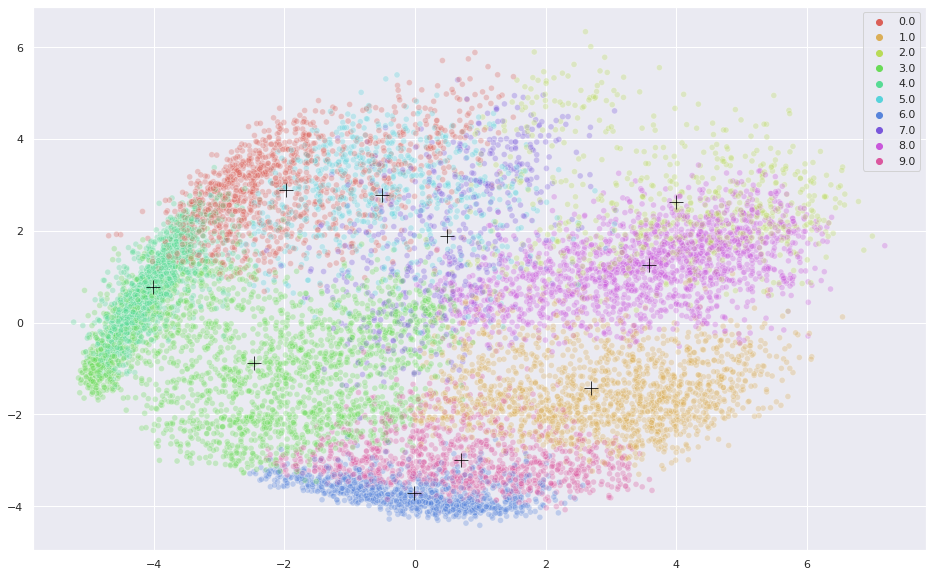

Using X_val_90var_zscore:
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Adjusted Rand Score: 0.3289877191750909


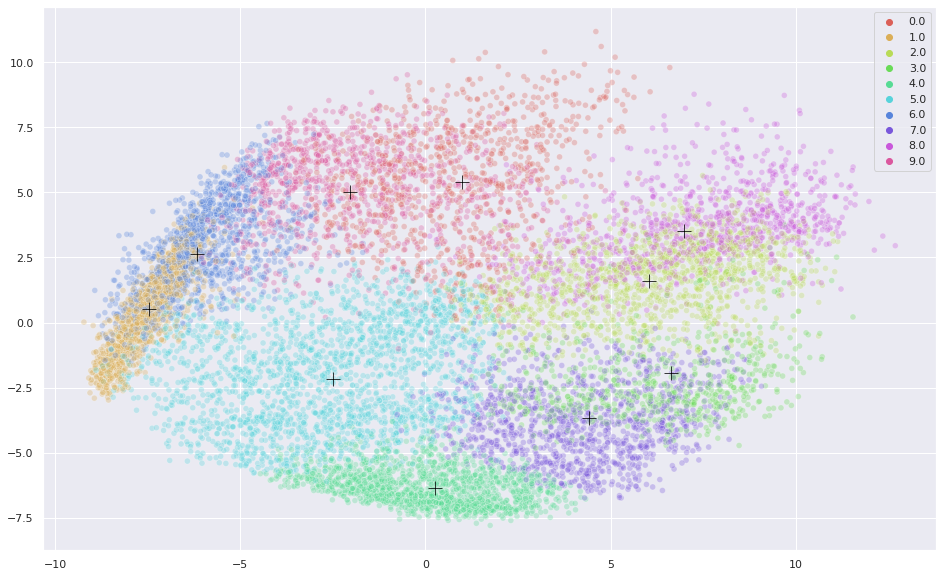

In [99]:
for name, reduced_features in reduced_features_zscore:
    print(f"Using {name}:")
    mbkmeans = MiniBatchKMeans(n_clusters=10).fit(reduced_features)
    show_clusters(mbkmeans, reduced_features)

## 4.2. K-Means

Using X_val_80var_zscore:
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Adjusted Rand Score: 0.34631161623573486


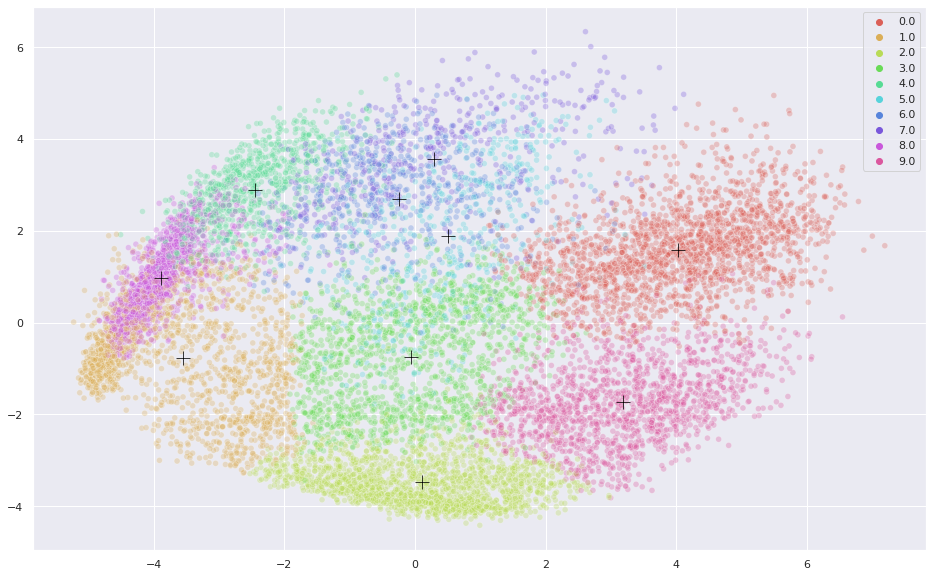

Using X_val_90var_zscore:
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Adjusted Rand Score: 0.3841075270669203


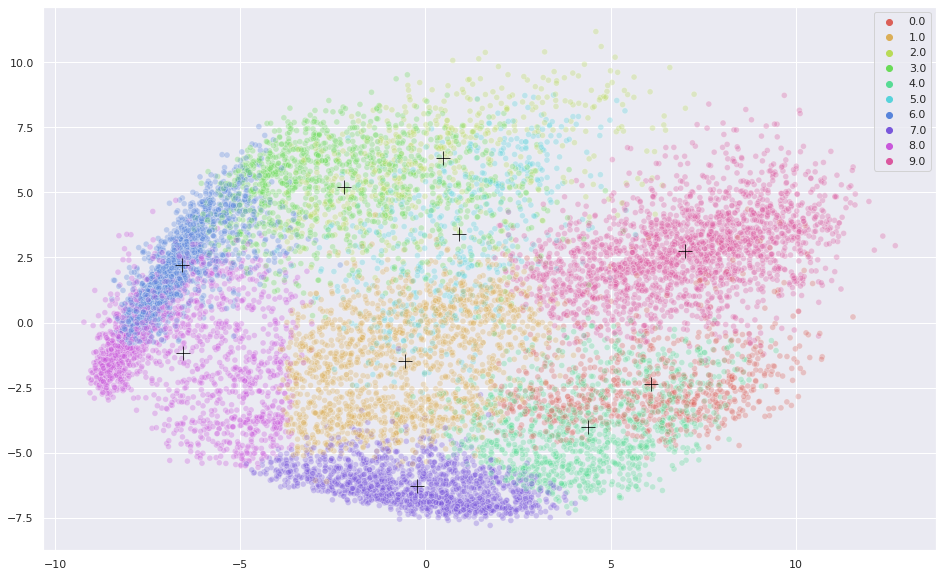

In [100]:
for name, reduced_features in reduced_features_zscore:
    print(f"Using {name}:")
    kmeans = KMeans(n_clusters=10).fit(reduced_features)
    show_clusters(kmeans, reduced_features)

### 4.2.1. Autoencoder reduced features (24 latent vector size)

In [0]:
# kmeans_ae_24 = KMeans(n_clusters=10).fit(X_val_ae_24)
# show_clusters(kmeans_ae_24, X_val_ae_24)

### 4.2.2. Autoencoder reduced features (84 latent vector size)

In [0]:
# kmeans_ae_84 = KMeans(n_clusters=10).fit(X_val_ae_84)
# show_clusters(kmeans_ae_84, X_val_ae_84)

### 4.2.3. PCA reduced features (80% explained variance, 24 principal components)

In [0]:
# kmeans_pca_80var = KMeans(n_clusters=10).fit(X_val_80var)
# show_clusters(kmeans_pca_80var, X_val_80var)

### 4.2.4. PCA reduced features (90% explained variance, 84 principal components)

In [0]:
# kmeans_pca_90var = KMeans(n_clusters=10).fit(X_val_90var)
# show_clusters(kmeans_pca_90var, X_val_90var)

## 4.3. Agglomerative clustering

Using X_val_80var_zscore:
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Adjusted Rand Score: 0.3829911713629829


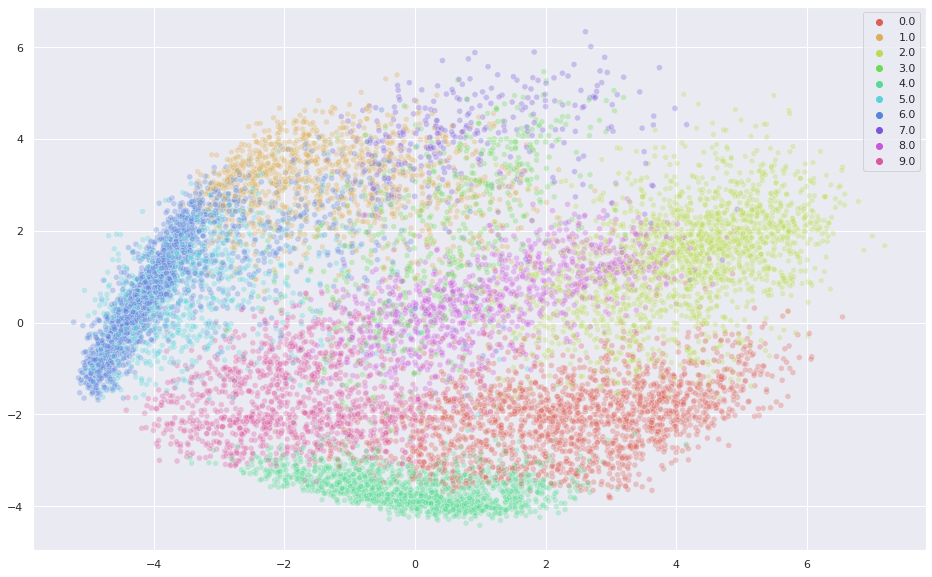

Using X_val_90var_zscore:
Clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Adjusted Rand Score: 0.3420215460321087


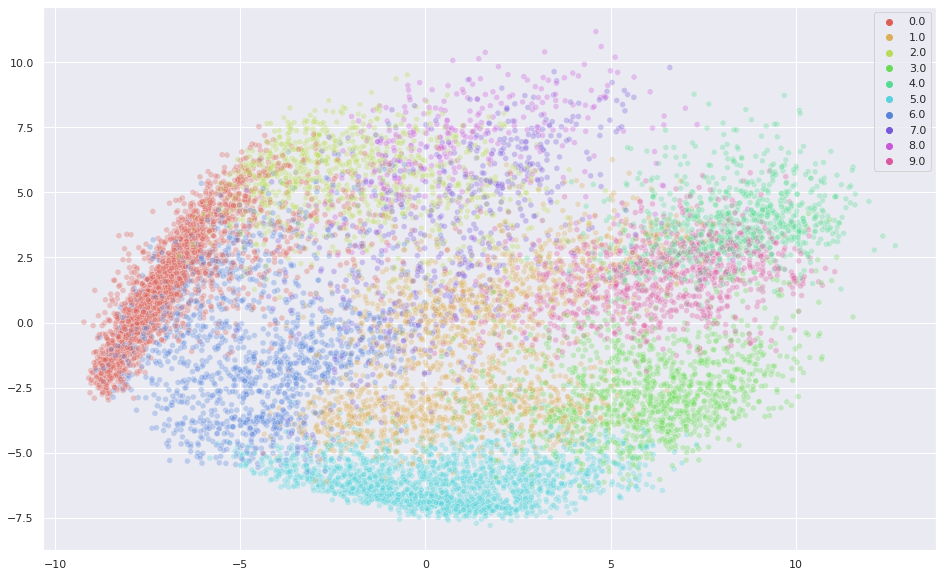

In [101]:
for name, reduced_features in reduced_features_zscore:
    print(f"Using {name}:")
    agglomerative = AgglomerativeClustering(n_clusters=10).fit(reduced_features)
    show_clusters(agglomerative, reduced_features)

### 4.2.1. PCA reduced features (80% explained variance, 24 principal components)

In [0]:
# agglomerative_pca_80var = AgglomerativeClustering(n_clusters=10).fit(X_val_80var)
# show_clusters(agglomerative_pca_80var, X_val_80var)

### 4.2.2. PCA reduced features (90% explained variance, 84 principal components)

In [0]:
# agglomerative_pca_90var = AgglomerativeClustering(n_clusters=10).fit(X_val_90var)
# show_clusters(agglomerative_pca_80var, X_val_90var)

In [0]:
strftime('%X')